In [ ]:
#!pip install scrapy
from scrapy import Selector
import requests

In [ ]:
url = 'https://en.wikipedia.org/wiki/The_Adoration_of_the_Kings_(Bruegel)'

In [ ]:
html = requests.get(url).content

In [ ]:
sel = Selector(text=html)

In [ ]:
sel.xpath('//p').extract()[1]

In [ ]:
sel.xpath('//body/div[@id="content"]/div[@id="bodyContent"][1]/div[@id="mw-content-text"][1]/div[@class="mw-parser-output"][1]/p[2]/text()').extract()[0]

In [ ]:
sel.css('p').extract()[1]

In [ ]:
sel.css('div#content>div#bodyContent>div#mw-content-text>div.mw-parser-output>p:nth-of-type(2)::text').extract()[0]

In [ ]:
backstage_url_singapore = 'https://www.backstage.com/casting/?gender=B&min_age=0&max_age=100&radius=50&page=1&sort_by=newest&job_type=tal&country_id=200&geo=103.85007%2C1.28967&location=Singapore%2C%20Singapore'

In [ ]:
backstage_selector = Selector(text=backstage_url_singapore)

In [ ]:
backstage_selector

In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess
import urllib.request
import os

In [2]:
class myScrap(scrapy.Spider):
    name = 'my_scraper'
    def start_requests(self):
        '''initiate first url and pass it to parser_front function
        Returns:
        scrapy.Request
        '''
        urls = ['https://en.wikipedia.org/wiki/Dutch_and_Flemish_Renaissance_painting']
        
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse_front)
            
    def parse_front(self, response):
        ''' Find list of painters and links to articles and send links to further parser
        Args:
            response
        Returns:
            response.follow
        '''
        link_parts = response.css('div#mw-content-text>div.mw-parser-output>div.div-col>ul>li')
        
        links = ['https://en.wikipedia.org'+ l for l in link_parts.xpath('./a/@href').extract()]
        
        for link in links:
            yield response.follow(url=link, callback=self.parse_again)
        
    def parse_again(self, response):
        ''' Find painter name and save to dir first image in article. 
        Form dictionary with painter name and corresponding filename
        '''
        painter = response.xpath('//h1/text()').extract()[0]
        image = response.css('img::attr(src)').extract()[0]
        cwd = os.getcwd()
        fullfilename = os.path.join(cwd, 'painter', painter+'.jpg')
        try:
            urllib.request.urlretrieve('https:'+image, fullfilename)
        except:
            print(painter, 'https:'+image)
        painter_dict[painter] = painter+'.jpg'
        
        
painter_dict={}
process = CrawlerProcess()
process.crawl(myScrap)
process.start()

2021-01-11 15:58:57 [scrapy.utils.log] INFO: Scrapy 2.4.1 started (bot: scrapybot)
2021-01-11 15:58:57 [scrapy.utils.log] INFO: Versions: lxml 4.4.1.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.7.4 (default, Aug 13 2019, 15:17:50) - [Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.7, Platform Darwin-20.2.0-x86_64-i386-64bit
2021-01-11 15:58:57 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-01-11 15:58:57 [scrapy.crawler] INFO: Overridden settings:
{}
2021-01-11 15:58:57 [scrapy.extensions.telnet] INFO: Telnet Password: ba824546fe2f351c
2021-01-11 15:58:57 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2021-01-11 15:58:57 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scr

2021-01-11 15:58:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Jan_Mabuse> (referer: https://en.wikipedia.org/wiki/Dutch_and_Flemish_Renaissance_painting)
2021-01-11 15:58:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Adriaen_Isenbrant> (referer: https://en.wikipedia.org/wiki/Dutch_and_Flemish_Renaissance_painting)
2021-01-11 15:58:59 [scrapy.core.engine] INFO: Closing spider (finished)
2021-01-11 15:58:59 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 13456,
 'downloader/request_count': 32,
 'downloader/request_method_count/GET': 32,
 'downloader/response_bytes': 738095,
 'downloader/response_count': 32,
 'downloader/response_status_count/200': 32,
 'elapsed_time_seconds': 2.491741,
 'finish_reason': 'finished',
 'finish_time': datetime.datetime(2021, 1, 11, 7, 58, 59, 975308),
 'log_count/DEBUG': 32,
 'log_count/INFO': 10,
 'memusage/max': 72904704,
 'memusage/startup': 72900608,
 '

Jan Sanders van Hemessen
painter/Jan Sanders van Hemessen.jpg


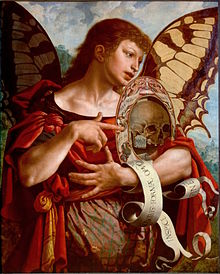

Joos van Cleve
painter/Joos van Cleve.jpg


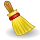

Catharina van Hemessen
painter/Catharina van Hemessen.jpg


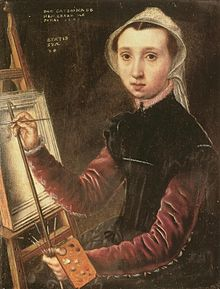

Hans Eworth
painter/Hans Eworth.jpg


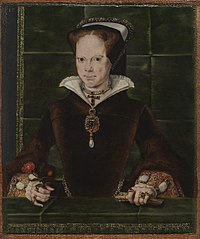

Joachim Beuckelaer
painter/Joachim Beuckelaer.jpg


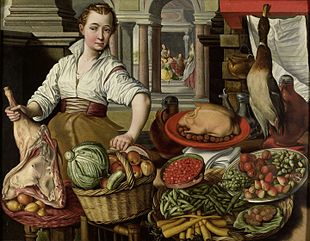

Pieter Coecke van Aelst
painter/Pieter Coecke van Aelst.jpg


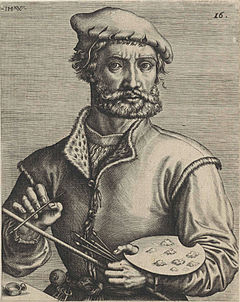

Maarten van Heemskerck
painter/Maarten van Heemskerck.jpg


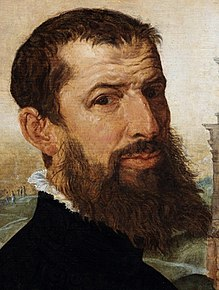

Pieter Brueghel the Younger
painter/Pieter Brueghel the Younger.jpg


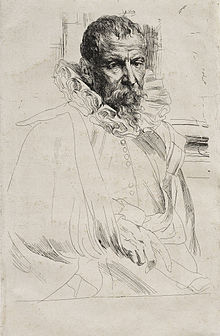

Pieter Bruegel the Elder
painter/Pieter Bruegel the Elder.jpg


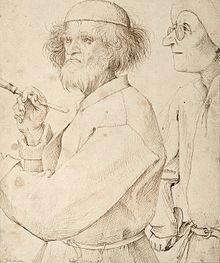

Hieronymus Cock
painter/Hieronymus Cock.jpg


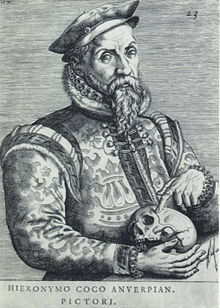

Corneille de Lyon
painter/Corneille de Lyon.jpg


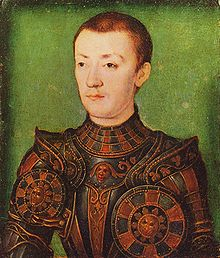

Frans Floris
painter/Frans Floris.jpg


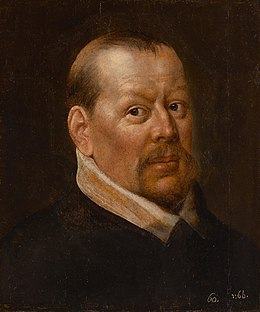

Hieronymus Bosch
painter/Hieronymus Bosch.jpg


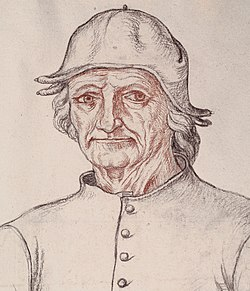

Simon Bening
painter/Simon Bening.jpg


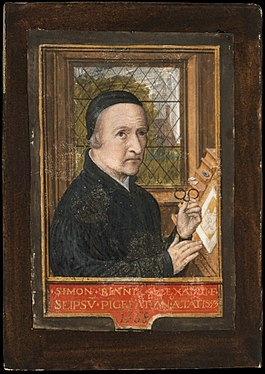

Pieter Aertsen
painter/Pieter Aertsen.jpg


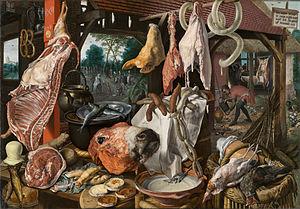

Jacob van Utrecht
painter/Jacob van Utrecht.jpg


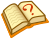

Levina Teerlinc
painter/Levina Teerlinc.jpg


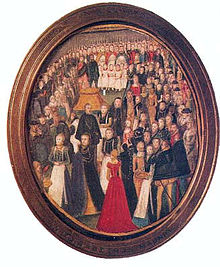

Jan van Scorel
painter/Jan van Scorel.jpg


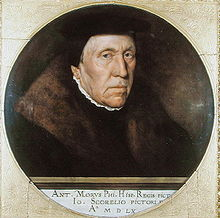

Marinus van Reymerswaele
painter/Marinus van Reymerswaele.jpg


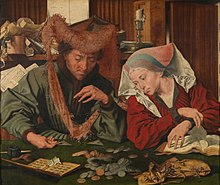

Jan Provoost
painter/Jan Provoost.jpg


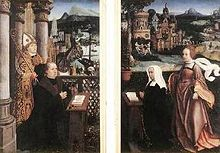

Pieter Pourbus
painter/Pieter Pourbus.jpg


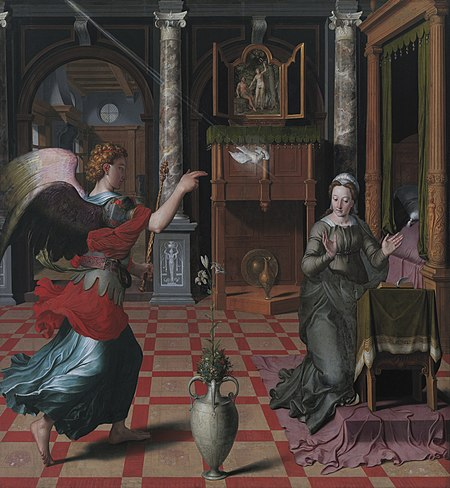

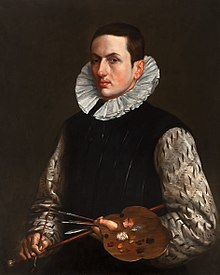

Frans Pourbus the Elder
painter/Frans Pourbus the Elder.jpg
Joachim Patinir
painter/Joachim Patinir.jpg


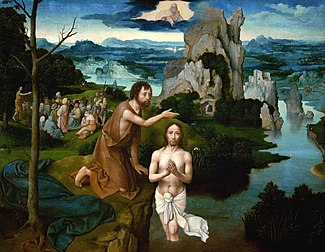

Bernard van Orley
painter/Bernard van Orley.jpg


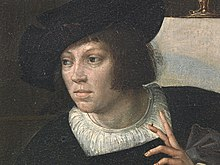

Jan Mostaert
painter/Jan Mostaert.jpg


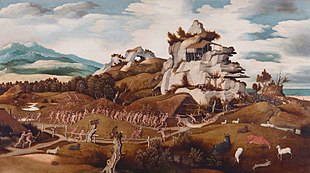

Quentin Matsys
painter/Quentin Matsys.jpg


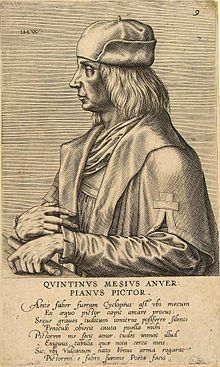

Lambert Lombard
painter/Lambert Lombard.jpg


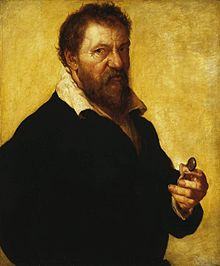

Lucas van Leyden
painter/Lucas van Leyden.jpg


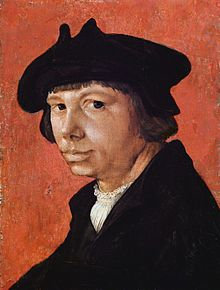

Antonis Mor
painter/Antonis Mor.jpg


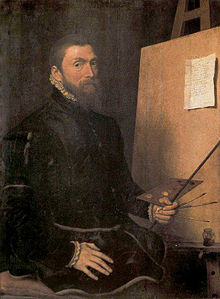

Jan Gossaert
painter/Jan Gossaert.jpg


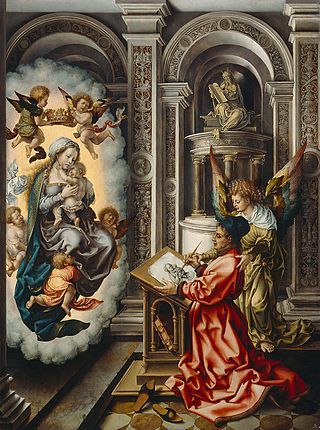

Adriaen Isenbrandt
painter/Adriaen Isenbrandt.jpg


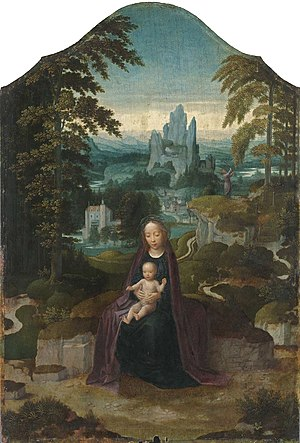

In [10]:
from IPython.display import Image
for painter, file in painter_dict.items():
    print(painter)
    print('painter/'+file)
    pil_img = Image(filename='painter/'+file)
    display(pil_img)



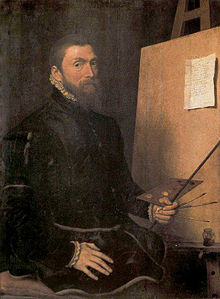

In [7]:
from IPython.display import Image 
pil_img = Image(filename='painter/Antonis Mor.jpg')
display(pil_img)

In [ ]:
fullfilename